In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [81]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1 
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [82]:
np.random.seed(10)
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# Add 'target' key for convenience 
df['target'] = cancer.target

# How many malignant cases do we have?
target = df['target']
malig_count = len(np.where(target == 0)[0])
total_count = df.shape[0]

malig_baserate = malig_count / total_count
print(malig_baserate)

0.37258347978910367


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


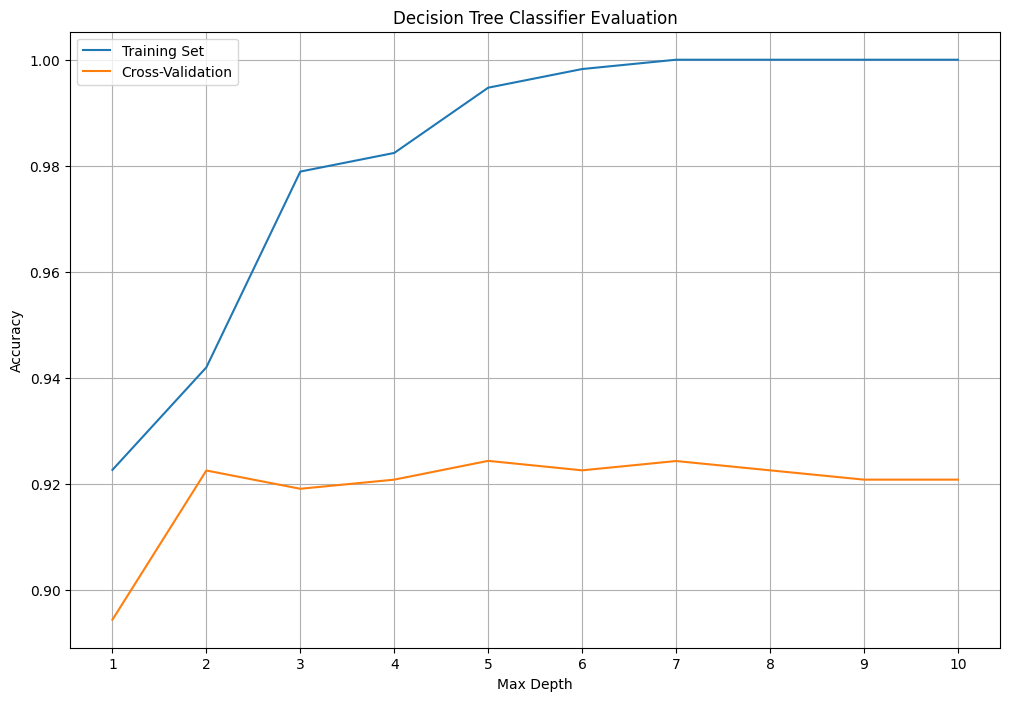

In [83]:
X, y = cancer.data, cancer.target

# Make lists
train_scores = []
cv_scores = []

# Vary max_depth from 1 to 10
max_depths = np.arange(1, 11)

for max_depth in max_depths:
    # Train a DecisionTreeClassifier with the current max_depth
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=10)
    clf = clf.fit(X, y)

    # Evaluate on the full dataset
    train_score = clf.score(X, y)
    train_scores.append(train_score)

    # Perform 10-fold cross-validation
    cv_score = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10,random_state=10,shuffle=True)))
    cv_scores.append(cv_score)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, train_scores, label='Training Set')
plt.plot(max_depths, cv_scores, label='Cross-Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Evaluation')
plt.legend()
plt.xticks(max_depths)
plt.grid(True)
plt.show()

### (b) 
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** 
Depths 7 through 10 each yielded the best full-dataset accuracy

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:**
Depths 5 and 7 yielded the best cross-validated accuracy



## 3\. 
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

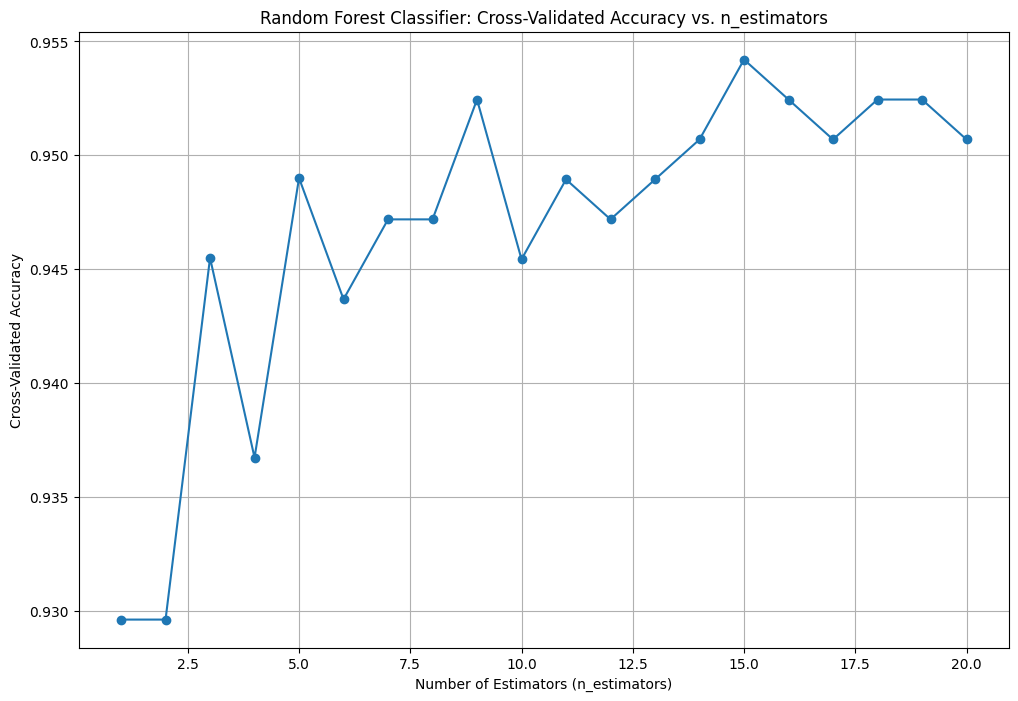

In [84]:
BEST_DEPTH = 7

# Initialize lists to store cross-validated accuracy scores
cv_scores = []

# Vary n_estimators from 1 to 20
n_estimators_values = np.arange(1, 21)

for n_estimators in n_estimators_values:
    # Initialize a RandomForestClassifier with the specified max_depth and n_estimators
    clf = ensemble.RandomForestClassifier(max_depth=BEST_DEPTH, n_estimators=n_estimators, random_state=10)
    
    # Perform 10-fold cross-validation
    cv_score = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10,random_state=10,shuffle=True)))
    cv_scores.append(cv_score)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators_values, cv_scores, marker='o')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Random Forest Classifier: Cross-Validated Accuracy vs. n_estimators')
plt.grid(True)
plt.show()

### (b) 
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:**
Yes, most values of n provide higher cross-validated accuracy than n=1.

### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:**
n=15 gives the best cross-validated accuracy.

### (d) 
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

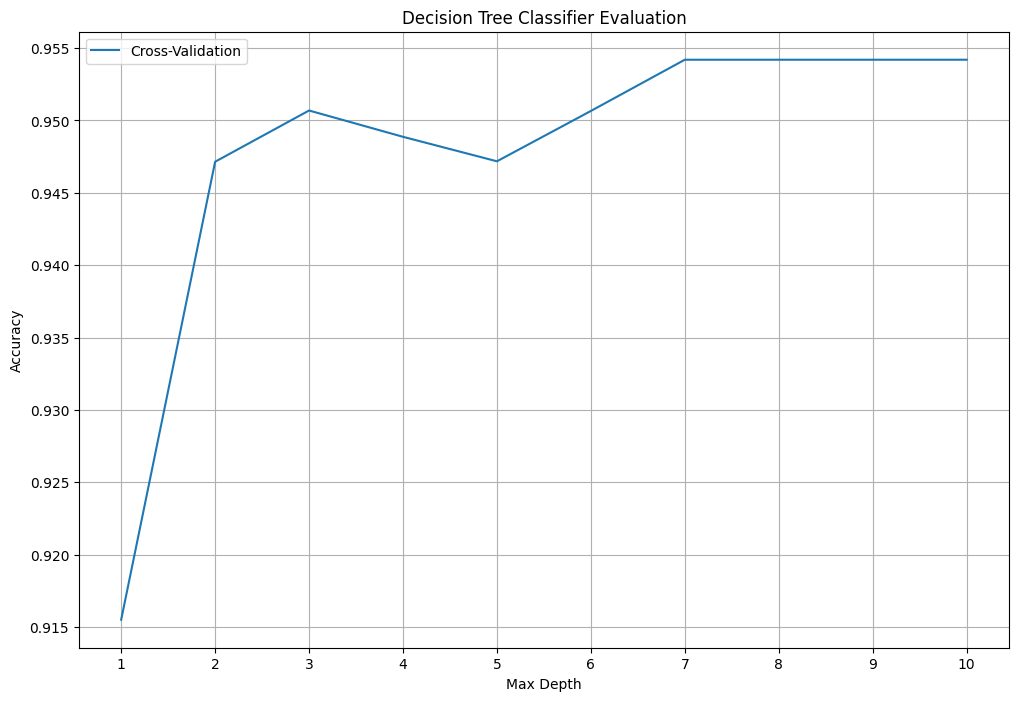

Max cross-validation accuracy score of 0.9541979949874685 at value 7


In [85]:
BEST_N_EST = 15

X, y = cancer.data, cancer.target

cv_scores = []

# Vary max_depth from 1 to 10
max_depths = np.arange(1, 11)

for max_depth in max_depths:
    # Initialize a RandomForestClassifier with the specified max_depth and n_estimators
    clf = ensemble.RandomForestClassifier(max_depth=max_depth, n_estimators=BEST_N_EST, random_state=10)
    
    # Perform 10-fold cross-validation
    cv_score = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10,random_state=10,shuffle=True)))
    cv_scores.append(cv_score)

# Plot the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, cv_scores, label='Cross-Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Evaluation')
plt.legend()
plt.xticks(max_depths)
plt.grid(True)
plt.show()

print(f'Max cross-validation accuracy score of {max(cv_scores)} at value {np.where(cv_scores == max(cv_scores))[0][0] + 1}')

### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:**
The optimal max_depth is still 7.

## 4\. 
For this last question, we will explore the dependability of our estimates. 
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

Random State 0: Best Max Depths = [7], Best Accuracy = 0.9351
Random State 1: Best Max Depths = [4, 7], Best Accuracy = 0.9402
Random State 2: Best Max Depths = [6], Best Accuracy = 0.9367
Random State 3: Best Max Depths = [2, 5], Best Accuracy = 0.9297
Random State 4: Best Max Depths = [6], Best Accuracy = 0.9350
Random State 5: Best Max Depths = [6], Best Accuracy = 0.9313
Random State 6: Best Max Depths = [6], Best Accuracy = 0.9438
Random State 7: Best Max Depths = [6], Best Accuracy = 0.9386
Random State 8: Best Max Depths = [6], Best Accuracy = 0.9385
Random State 9: Best Max Depths = [4], Best Accuracy = 0.9439
Random State 10: Best Max Depths = [5], Best Accuracy = 0.9244
Random State 11: Best Max Depths = [5], Best Accuracy = 0.9385
Random State 12: Best Max Depths = [5], Best Accuracy = 0.9402
Random State 13: Best Max Depths = [2], Best Accuracy = 0.9297
Random State 14: Best Max Depths = [5, 6], Best Accuracy = 0.9262
Random State 15: Best Max Depths = [6], Best Accuracy = 

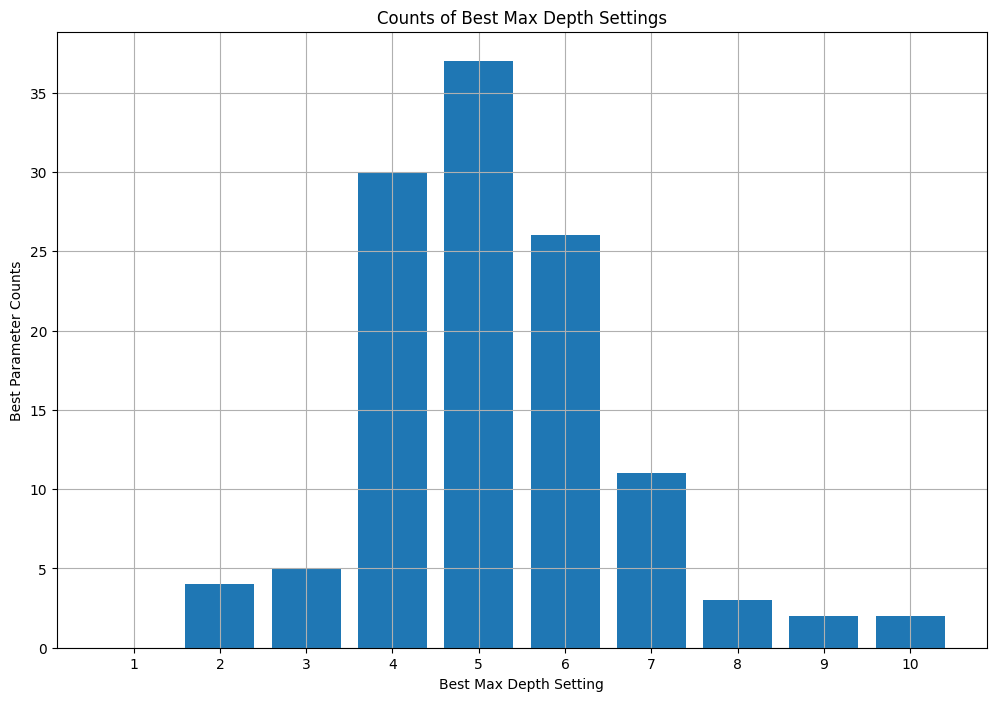

In [86]:
# Vary max_depth from 1 to 10
max_depths = np.arange(1, 11)

# Initialize dictionaries to store best max depth and corresponding accuracies for each random state
best_max_depths = {}
best_accuracies = {}

# Vary random state from 0 to 99
random_states = np.arange(100)  # Note: It's 100 to include the upper bound

for random_state in random_states:
    best_accuracy = -1  # Initialize with a low value
    best_depths = []    # In case multiple depths achieve the best accuracy for a random state
    
    for max_depth in max_depths:
        # Initialize a DecisionTreeClassifier with the specified max_depth and random_state
        clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
        
        # Perform 10-fold cross-validation
        cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10,random_state=random_state,shuffle=True)))
        
        # Update best accuracy and best depths
        if cv_accuracy > best_accuracy:
            best_accuracy = cv_accuracy
            best_depths = [max_depth]
        elif cv_accuracy == best_accuracy:
            best_depths.append(max_depth)
    
    # Store the best max depth(s) and corresponding accuracy for the current random state
    best_max_depths[random_state] = best_depths
    best_accuracies[random_state] = best_accuracy

# Print the results
for random_state in random_states:
    print(f"Random State {random_state}: Best Max Depths = {best_max_depths[random_state]}, Best Accuracy = {best_accuracies[random_state]:.4f}")
    
# Calculate the counts for each max depth setting
max_depth_counts = {max_depth: 0 for max_depth in max_depths}
for depths in best_max_depths.values():
    for depth in depths:
        max_depth_counts[depth] += 1

# Plot the results as a bar chart
plt.figure(figsize=FIGSIZE)
plt.grid(True)
plt.bar(max_depth_counts.keys(), max_depth_counts.values())
plt.xlabel('Best Max Depth Setting')
plt.ylabel('Best Parameter Counts')
plt.title('Counts of Best Max Depth Settings')
plt.xticks(max_depths)
plt.show()


### (b) 
What are the top two most frequent parameter settings?

**Student answer here:**
The most frequent setting is 5, and the second-most frequent is 4.